# Finance & Analytics Club

## OBV (On Balance Volume)

OBV is a momentum indicator which uses change in trading volume as an indicator of future asset price movements.

A rising OBV reflects positive volume pressure that can lead to higher prices and falling OBV predicts decline in prices.

Leading market indicator but prone to making false signal. Typically, used in conjunction with lagging indicators such as MACD.

The calculation in OBV is fairly straightforward and it is simply the cumulative sum of volume traded, adjusted for the direction of the corresponding asset price move. 

More at: https://www.investopedia.com/terms/o/onbalancevolume.asp

Import necessary libraries

In [1]:
import pandas_datareader.data as pdr
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Download historical data for required stocks

In [2]:
ticker = "AAPL"
ohlcv = pdr.get_data_yahoo(ticker,dt.date.today()-dt.timedelta(364),dt.date.today())

### Function to calculate On Balance Volume

In [3]:
def OBV(DF):
    df = DF.copy()
    df['daily_ret'] = df['Adj Close'].pct_change() # Percentage change between the current and a prior element
    df['direction'] = np.where(df['daily_ret']>=0,1,-1)
    df['direction'][0] = 0
    df['vol_adj'] = df['Volume'] * df['direction']
    df['obv'] = df['vol_adj'].cumsum()
    return df

In [5]:
df = OBV(ohlcv)
df = df.dropna()
df

/Users/subhamgupta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,High,Low,Open,Close,Volume,Adj Close,daily_ret,direction,vol_adj,obv
Date,,,,,,,,,,
2019-04-02,194.460007,191.050003,191.089996,194.020004,22765700.0,191.513290,0.014537,1,22765700.0,22765700.0
2019-04-03,196.500000,193.149994,193.250000,195.350006,23271800.0,192.826111,0.006855,1,23271800.0,46037500.0
2019-04-04,196.369995,193.139999,194.789993,195.690002,19114300.0,193.161682,0.001740,1,19114300.0,65151800.0
2019-04-05,197.100006,195.929993,196.449997,197.000000,18526600.0,194.454758,0.006694,1,18526600.0,83678400.0
2019-04-08,200.229996,196.339996,196.419998,200.100006,25881700.0,197.514709,0.015736,1,25881700.0,109560100.0
...,...,...,...,...,...,...,...,...,...,...
2020-03-23,228.500000,212.610001,228.080002,224.369995,84188200.0,224.369995,-0.021244,-1,-84188200.0,-354490000.0
2020-03-24,247.690002,234.300003,236.360001,246.880005,71882800.0,246.880005,0.100325,1,71882800.0,-282607200.0
2020-03-25,258.250000,244.300003,250.750000,245.520004,75900500.0,245.520004,-0.005509,-1,-75900500.0,-358507700.0


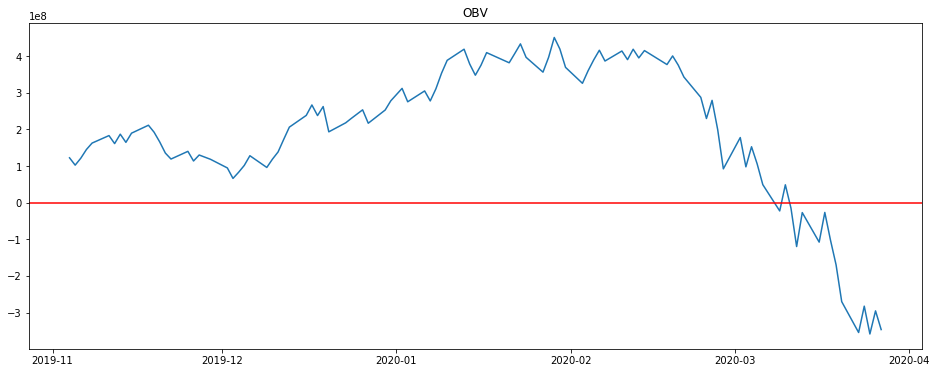

In [7]:
plt.figure(figsize = (16,6))
plt.plot(df.iloc[-100:,-1])
plt.title('OBV')
plt.axhline(y=0, color = 'red')
plt.show()